# 01. Exploration et Validation des Données

**Objectif :** Ce notebook sert à valider le `DataManager` (tâche 2.1) et à effectuer une première analyse exploratoire des données (tâche 2.4). 

Nous allons :
1.  Tester le chargement d'un seul ticker (`AAPL`).
2.  Afficher les statistiques descriptives.
3.  Visualiser les données (OHLCV + Indicateurs) de manière interactive.
4.  Vérifier la qualité des données (NaNs, outliers).
5.  Tester le téléchargement en batch d'une liste de 10 tickers (S&P 500 + CAC 40).

In [4]:
# --- 1. Bibliothèques natives ---
import sys
import os
from pathlib import Path

# --- 2. Bibliothèques tierces ---
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Configuration du Chemin ---
# Ajoute la racine du projet au PYTHONPATH pour que les imports (utils, etc.) fonctionnent
try:
    # Si exécuté depuis 'notebooks/'
    PROJECT_ROOT = Path(__file__).resolve().parent.parent
except NameError:
    # Si exécuté interactivement (cas le plus courant)
    PROJECT_ROOT = Path.cwd().parent

if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

print(f"Project Root (ajouté au sys.path): {PROJECT_ROOT}")

# --- 3. Imports locaux du projet ---
from utils.data_manager import DataManager
from utils.data_processor import add_returns # Tâche 2.3

print("Modules importés avec succès.")

Project Root (ajouté au sys.path): C:\Users\saill\Desktop\t_project
Modules importés avec succès.


## 1. Test de Téléchargement (Ticker Unique)

Nous initialisons `DataManager` et chargeons les données pour `AAPL` sur une période de 3 ans. 

Nous forçons `use_cache=False` pour ce premier test afin de valider le processus de téléchargement et de sauvegarde. Nous activons `add_indicators=True` pour vérifier que le `DataManager` ajoute bien les colonnes.

In [5]:
dm = DataManager()

ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2024-12-31"

df_aapl = dm.get_data(
    ticker=ticker,
    start_date=start_date,
    end_date=end_date,
    use_cache=False,      # Force le téléchargement pour ce test
    add_indicators=True   # Valide l'ajout d'indicateurs
)

df_aapl.info()
df_aapl.head()

2025-10-31 01:55:15 - utils.data_manager - INFO - DataManager initialisé. Cache: C:\Users\saill\Desktop\t_project\data\cache. Timezone: Europe/Paris
2025-10-31 01:55:15 - utils.data_manager - INFO - Pas de cache (ou cache insuffisant) pour AAPL. Téléchargement de la plage par défaut...
2025-10-31 01:55:16 - utils.data_manager - INFO - Données téléchargées avec succès pour AAPL (2515 lignes).
2025-10-31 01:55:16 - utils.data_manager - INFO - Données prêtes pour AAPL (719 lignes de 2022-01-01 à 2024-12-31).


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719 entries, 2022-02-18 06:00:00+01:00 to 2024-12-30 06:00:00+01:00
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            719 non-null    float64
 1   high            719 non-null    float64
 2   low             719 non-null    float64
 3   close           719 non-null    float64
 4   volume          719 non-null    int64  
 5   RSI_14          719 non-null    float64
 6   MACD_12_26_9    719 non-null    float64
 7   MACDh_12_26_9   719 non-null    float64
 8   MACDs_12_26_9   719 non-null    float64
 9   BBL_20_2.0_2.0  719 non-null    float64
 10  BBM_20_2.0_2.0  719 non-null    float64
 11  BBU_20_2.0_2.0  719 non-null    float64
 12  BBB_20_2.0_2.0  719 non-null    float64
 13  BBP_20_2.0_2.0  719 non-null    float64
 14  ATRr_14         719 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 89.9 KB


,open,high,low,close,volume,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0,ATRr_14
Date,,,,,,,,,,,,,,,
2022-02-18 06:00:00+01:00,166.704191,167.410967,163.140788,164.230423,82772700,38.701687,-0.045453,-0.578890,0.533438,155.590337,166.545623,177.500909,13.155898,0.394334,4.136643
2022-02-22 06:00:00+01:00,161.952917,163.631549,159.174841,161.305038,91162800,35.147092,-0.529514,-0.850361,0.320847,156.108729,166.688239,177.267749,12.693769,0.245584,4.202282
2022-02-23 06:00:00+01:00,162.502664,163.101472,156.818906,157.133041,90009200,30.802124,-1.235538,-1.245109,0.009570,156.227899,166.712453,177.197006,12.578009,0.043166,4.350874
2022-02-24 06:00:00+01:00,149.780442,159.862011,149.211082,159.754028,141147500,36.142986,-1.565530,-1.260080,-0.305450,156.956733,166.872127,176.787521,11.883823,0.141058,4.800877
2022-02-25 06:00:00+01:00,160.833839,162.090353,157.918332,161.825317,91974200,40.079013,-1.640998,-1.068439,-0.572559,158.275729,167.158404,176.041079,10.627853,0.199804,4.755959


## 2. Statistiques Descriptives

Un simple `.describe()` nous donne un aperçu rapide de la distribution des prix, des volumes et des indicateurs.

In [6]:
# Appliquer un formatage pour une meilleure lisibilité
print(df_aapl.describe().apply(lambda s: s.apply('{:,.2f}'.format)))

         open    high     low   close          volume  RSI_14 MACD_12_26_9  \
count  719.00  719.00  719.00  719.00          719.00  719.00       719.00   
mean   176.45  178.32  174.79  176.66   66,869,234.91   53.28         0.72   
std     29.95   29.95   29.96   30.02   27,869,160.49   12.56         3.08   
min    124.26  125.99  122.44  123.28   23,234,700.00   22.22        -6.50   
25%    152.28  154.58  150.58  152.43   48,270,000.00   42.24        -1.75   
50%    171.70  173.41  170.43  171.99   60,412,400.00   53.35         0.60   
75%    190.92  192.18  189.67  190.86   78,453,000.00   63.58         3.00   
max    257.28  259.18  256.72  258.10  318,679,900.00   80.92         8.90   

      MACDh_12_26_9 MACDs_12_26_9 BBL_20_2.0_2.0 BBM_20_2.0_2.0  \
count        719.00        719.00         719.00         719.00   
mean           0.03          0.69         165.65         175.57   
std            0.94          2.87          28.40          28.30   
min           -2.47         -

In [10]:
bbands_cols = [col for col in df_aapl.columns if 'BB' in col.upper()]

print("Colonnes 'BBands' réellement trouvées dans le DataFrame :")
print(bbands_cols)


Colonnes 'BBands' réellement trouvées dans le DataFrame :
['BBL_20_2.0_2.0', 'BBM_20_2.0_2.0', 'BBU_20_2.0_2.0', 'BBB_20_2.0_2.0', 'BBP_20_2.0_2.0']


## 3. Visualisation des Données (Plotly)

Nous vérifions visuellement les données OHLCV ainsi que les indicateurs ajoutés par `DataManager` :
* **Prix** + **Bandes de Bollinger** (`BBU_20_2.0`, `BBL_20_2.0`)
* **Volume**
* **MACD** (`MACD_12_26_9`, `MACDs_12_26_9`, `MACDh_12_26_9`)
* **RSI** (`RSI_14`)

*(Note: L'ATR `ATRr_14` est calculé mais n'est pas affiché ici pour plus de clarté)*

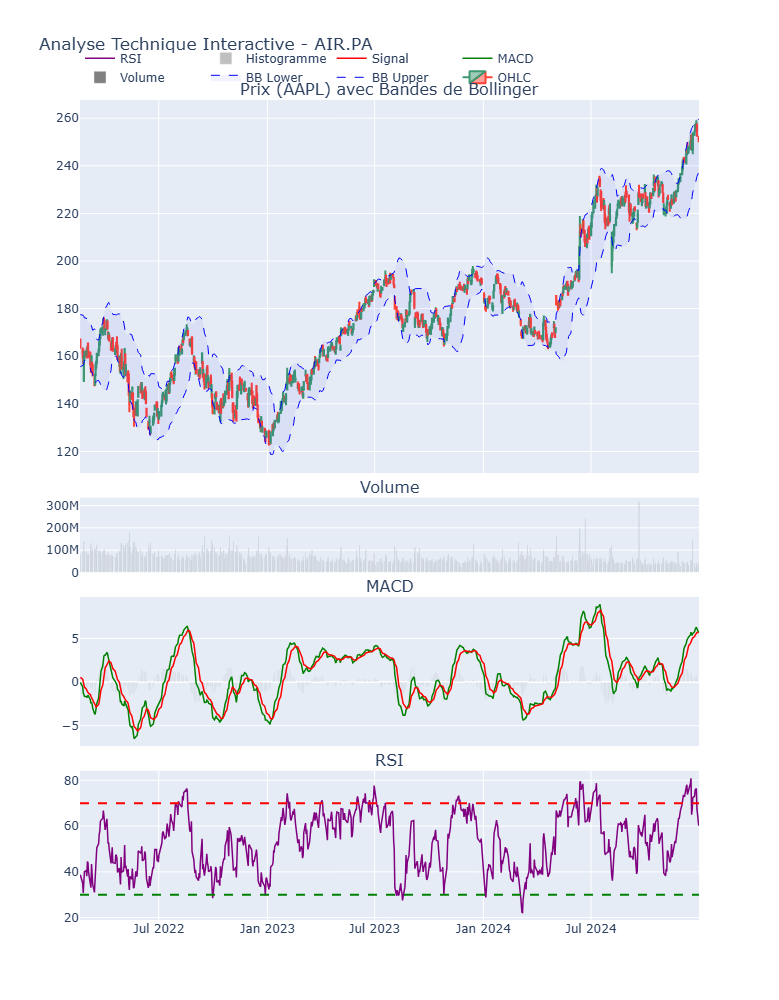

In [13]:
fig = make_subplots(
    rows=4, 
    cols=1, 
    shared_xaxes=True, 
    vertical_spacing=0.03,
    subplot_titles=('Prix (AAPL) avec Bandes de Bollinger', 'Volume', 'MACD', 'RSI'),
    row_heights=[0.5, 0.1, 0.2, 0.2]
)

# --- Rangée 1: Prix + Bandes de Bollinger ---
fig.add_trace(go.Candlestick(x=df_aapl.index,
                open=df_aapl['open'],
                high=df_aapl['high'],
                low=df_aapl['low'],
                close=df_aapl['close'],
                name='OHLC'), row=1, col=1)

# LIGNE CORRIGÉE : Utilise 'BBU_20_2.0_2.0'
fig.add_trace(go.Scatter(x=df_aapl.index, y=df_aapl['BBU_20_2.0_2.0'], 
                         line=dict(color='blue', width=1, dash='dash'), 
                         name='BB Upper'), row=1, col=1)

# LIGNE CORRIGÉE : Utilise 'BBL_20_2.0_2.0'
fig.add_trace(go.Scatter(x=df_aapl.index, y=df_aapl['BBL_20_2.0_2.0'], 
                         line=dict(color='blue', width=1, dash='dash'), 
                         name='BB Lower', fill='tonexty', fillcolor='rgba(0,0,255,0.05)'), row=1, col=1)

# --- Rangée 2: Volume ---
fig.add_trace(go.Bar(x=df_aapl.index, y=df_aapl['volume'], name='Volume', marker_color='grey'), row=2, col=1)

# --- Rangée 3: MACD ---
fig.add_trace(go.Scatter(x=df_aapl.index, y=df_aapl['MACD_12_26_9'], 
                         line=dict(color='green', width=1.5), name='MACD'), row=3, col=1)
fig.add_trace(go.Scatter(x=df_aapl.index, y=df_aapl['MACDs_12_26_9'], 
                         line=dict(color='red', width=1.5), name='Signal'), row=3, col=1)
fig.add_trace(go.Bar(x=df_aapl.index, y=df_aapl['MACDh_12_26_9'], 
                      name='Histogramme', marker_color='grey', opacity=0.5), row=3, col=1)

# --- Rangée 4: RSI ---
fig.add_trace(go.Scatter(x=df_aapl.index, y=df_aapl['RSI_14'], 
                         line=dict(color='purple', width=1.5), name='RSI'), row=4, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="red", row=4, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="green", row=4, col=1)

# --- Mise en Forme ---
fig.update_layout(
    height=1000, 
    title_text=f"Analyse Technique Interactive - {ticker}",
    xaxis_rangeslider_visible=False,
    legend_orientation='h',
    legend_yanchor='bottom',
    legend_y=1.01,
    legend_xanchor='left',
    legend_x=0
)

fig.show()

## 4. Vérification de la Qualité des Données

Nous vérifions deux points critiques :

1.  **Données Manquantes (NaNs) :** `DataManager` est censé supprimer les `NaNs` initiaux après le calcul des indicateurs. Le total des NaNs doit être 0.
2.  **Outliers (Rendements) :** Nous utilisons `data_processor.add_returns` pour calculer les rendements journaliers et nous vérifions les quantiles extrêmes (1% et 99%). Des valeurs extrêmes (> 15-20%) pourraient indiquer des problèmes de données (splits non ajustés, etc.).

In [14]:
# 1. Vérification des NaNs
nan_count = df_aapl.isnull().sum().sum()
print(f"Total des valeurs NaN dans le DataFrame: {nan_count}")

if nan_count == 0:
    print("Vérification NaN: SUCCÈS. (Les périodes de chauffe des indicateurs ont été purgées)")
else:
    print("Vérification NaN: ÉCHEC.")
    print(df_aapl.isnull().sum())

# 2. Détection d'outliers (via les rendements)
df_aapl_returns = add_returns(df_aapl[['open', 'high', 'low', 'close', 'volume']].copy()) # Utilise une copie sans indicateurs

print("\n--- Statistiques des Rendements Journaliers (pct_return) ---")
print(df_aapl_returns['pct_return'].describe(percentiles=[.01, .05, .25, .75, .95, .99]).apply("{:,.4f}".format))

max_return = df_aapl_returns['pct_return'].abs().max()
print(f"\nRendement journalier absolu MAX: {max_return:.2%}")
if max_return > 0.25: # Seuil arbitraire de 25%
    print("AVERTISSEMENT: Détection d'un rendement journalier extrême > 25%. Vérification manuelle requise.")
else:
    print("Vérification Outliers (Rendements): SUCCÈS.")

Total des valeurs NaN dans le DataFrame: 0
Vérification NaN: SUCCÈS. (Les périodes de chauffe des indicateurs ont été purgées)

--- Statistiques des Rendements Journaliers (pct_return) ---
count    719.0000
mean       0.0007
std        0.0170
min       -0.0587
1%        -0.0461
5%        -0.0278
25%       -0.0082
50%        0.0013
75%        0.0100
95%        0.0257
99%        0.0429
max        0.0890
Name: pct_return, dtype: object

Rendement journalier absolu MAX: 8.90%
Vérification Outliers (Rendements): SUCCÈS.


## 5. Test de Téléchargement en Batch (5-10 Tickers)

Enfin, nous testons la capacité du `DataManager` à charger une liste de tickers (5 US, 5 FR). 

Pour ce test, nous utilisons `use_cache=True` (le comportement par défaut) pour vérifier que `AAPL` est bien lu depuis le cache (devrait être quasi-instantané) et que les 9 autres sont téléchargés.

In [15]:
# Liste de tickers (5 S&P 500, 5 CAC 40)
# (Basé sur les fichiers config/markets/ que nous avons créés)
sp500_sample = ["AAPL", "MSFT", "GOOG", "TSLA", "NVDA"]
cac40_sample = ["MC.PA", "TTE.PA", "SAN.PA", "OR.PA", "AIR.PA"]
all_tickers = sp500_sample + cac40_sample

print(f"Début du test de chargement en batch pour {len(all_tickers)} tickers...")

data_store = {}
failed_tickers = []

for ticker in all_tickers:
    print(f"--- Chargement {ticker} ---")
    try:
        df = dm.get_data(
            ticker=ticker, 
            start_date=start_date, 
            end_date=end_date, 
            add_indicators=False, # Pas besoin d'indicateurs pour ce test
            use_cache=True
        )
        
        if df.empty:
            print(f"ÉCHEC: Pas de données retournées pour {ticker}")
            failed_tickers.append(ticker)
        else:
            print(f"SUCCÈS: {len(df)} lignes chargées pour {ticker}")
            data_store[ticker] = df
            
    except Exception as e:
        print(f"ERREUR CRITIQUE pour {ticker}: {e}")
        failed_tickers.append(ticker)

print("\n--- RAPPORT DU TEST BATCH ---")
print(f"Téléchargements réussis: {len(data_store)} / {len(all_tickers)}")
if failed_tickers:
    print(f"Échecs: {failed_tickers}")
else:
    print("Échecs: 0")

Début du test de chargement en batch pour 10 tickers...
--- Chargement AAPL ---


2025-10-31 02:04:02 - utils.data_manager - WARNING - Erreur au chargement du cache C:\Users\saill\Desktop\t_project\data\cache\AAPL_1d.csv: 'Index' object has no attribute 'tz'. Fichier sera re-téléchargé.
2025-10-31 02:04:02 - utils.data_manager - INFO - Pas de cache (ou cache insuffisant) pour AAPL. Téléchargement de la plage par défaut...
2025-10-31 02:04:02 - utils.data_manager - INFO - Données téléchargées avec succès pour AAPL (2515 lignes).
2025-10-31 02:04:02 - utils.data_manager - INFO - Données prêtes pour AAPL (752 lignes de 2022-01-01 à 2024-12-31).


SUCCÈS: 752 lignes chargées pour AAPL
--- Chargement MSFT ---


2025-10-31 02:04:03 - utils.data_manager - WARNING - Erreur au chargement du cache C:\Users\saill\Desktop\t_project\data\cache\MSFT_1d.csv: 'Index' object has no attribute 'tz'. Fichier sera re-téléchargé.
2025-10-31 02:04:03 - utils.data_manager - INFO - Pas de cache (ou cache insuffisant) pour MSFT. Téléchargement de la plage par défaut...
2025-10-31 02:04:03 - utils.data_manager - INFO - Données téléchargées avec succès pour MSFT (2515 lignes).
2025-10-31 02:04:03 - utils.data_manager - INFO - Données prêtes pour MSFT (752 lignes de 2022-01-01 à 2024-12-31).


SUCCÈS: 752 lignes chargées pour MSFT
--- Chargement GOOG ---


2025-10-31 02:04:03 - utils.data_manager - WARNING - Erreur au chargement du cache C:\Users\saill\Desktop\t_project\data\cache\GOOG_1d.csv: 'Index' object has no attribute 'tz'. Fichier sera re-téléchargé.
2025-10-31 02:04:03 - utils.data_manager - INFO - Pas de cache (ou cache insuffisant) pour GOOG. Téléchargement de la plage par défaut...
2025-10-31 02:04:03 - utils.data_manager - INFO - Données téléchargées avec succès pour GOOG (2515 lignes).
2025-10-31 02:04:03 - utils.data_manager - INFO - Données prêtes pour GOOG (752 lignes de 2022-01-01 à 2024-12-31).


SUCCÈS: 752 lignes chargées pour GOOG
--- Chargement TSLA ---


2025-10-31 02:04:04 - utils.data_manager - WARNING - Erreur au chargement du cache C:\Users\saill\Desktop\t_project\data\cache\TSLA_1d.csv: 'Index' object has no attribute 'tz'. Fichier sera re-téléchargé.
2025-10-31 02:04:04 - utils.data_manager - INFO - Pas de cache (ou cache insuffisant) pour TSLA. Téléchargement de la plage par défaut...
2025-10-31 02:04:04 - utils.data_manager - INFO - Données téléchargées avec succès pour TSLA (2515 lignes).
2025-10-31 02:04:04 - utils.data_manager - INFO - Données prêtes pour TSLA (752 lignes de 2022-01-01 à 2024-12-31).


SUCCÈS: 752 lignes chargées pour TSLA
--- Chargement NVDA ---


2025-10-31 02:04:04 - utils.data_manager - WARNING - Erreur au chargement du cache C:\Users\saill\Desktop\t_project\data\cache\NVDA_1d.csv: 'Index' object has no attribute 'tz'. Fichier sera re-téléchargé.
2025-10-31 02:04:04 - utils.data_manager - INFO - Pas de cache (ou cache insuffisant) pour NVDA. Téléchargement de la plage par défaut...
2025-10-31 02:04:04 - utils.data_manager - INFO - Données téléchargées avec succès pour NVDA (2515 lignes).
2025-10-31 02:04:04 - utils.data_manager - INFO - Données prêtes pour NVDA (752 lignes de 2022-01-01 à 2024-12-31).


SUCCÈS: 752 lignes chargées pour NVDA
--- Chargement MC.PA ---


2025-10-31 02:04:05 - utils.data_manager - WARNING - Erreur au chargement du cache C:\Users\saill\Desktop\t_project\data\cache\MC.PA_1d.csv: 'Index' object has no attribute 'tz'. Fichier sera re-téléchargé.
2025-10-31 02:04:05 - utils.data_manager - INFO - Pas de cache (ou cache insuffisant) pour MC.PA. Téléchargement de la plage par défaut...
2025-10-31 02:04:05 - utils.data_manager - INFO - Données téléchargées avec succès pour MC.PA (2560 lignes).
2025-10-31 02:04:05 - utils.data_manager - INFO - Données prêtes pour MC.PA (767 lignes de 2022-01-01 à 2024-12-31).


SUCCÈS: 767 lignes chargées pour MC.PA
--- Chargement TTE.PA ---


2025-10-31 02:04:05 - utils.data_manager - WARNING - Erreur au chargement du cache C:\Users\saill\Desktop\t_project\data\cache\TTE.PA_1d.csv: 'Index' object has no attribute 'tz'. Fichier sera re-téléchargé.
2025-10-31 02:04:05 - utils.data_manager - INFO - Pas de cache (ou cache insuffisant) pour TTE.PA. Téléchargement de la plage par défaut...
2025-10-31 02:04:05 - utils.data_manager - INFO - Données téléchargées avec succès pour TTE.PA (2560 lignes).
2025-10-31 02:04:05 - utils.data_manager - INFO - Données prêtes pour TTE.PA (767 lignes de 2022-01-01 à 2024-12-31).


SUCCÈS: 767 lignes chargées pour TTE.PA
--- Chargement SAN.PA ---


2025-10-31 02:04:06 - utils.data_manager - WARNING - Erreur au chargement du cache C:\Users\saill\Desktop\t_project\data\cache\SAN.PA_1d.csv: 'Index' object has no attribute 'tz'. Fichier sera re-téléchargé.
2025-10-31 02:04:06 - utils.data_manager - INFO - Pas de cache (ou cache insuffisant) pour SAN.PA. Téléchargement de la plage par défaut...
2025-10-31 02:04:06 - utils.data_manager - INFO - Données téléchargées avec succès pour SAN.PA (2560 lignes).
2025-10-31 02:04:06 - utils.data_manager - INFO - Données prêtes pour SAN.PA (767 lignes de 2022-01-01 à 2024-12-31).


SUCCÈS: 767 lignes chargées pour SAN.PA
--- Chargement OR.PA ---


2025-10-31 02:04:06 - utils.data_manager - WARNING - Erreur au chargement du cache C:\Users\saill\Desktop\t_project\data\cache\OR.PA_1d.csv: 'Index' object has no attribute 'tz'. Fichier sera re-téléchargé.
2025-10-31 02:04:06 - utils.data_manager - INFO - Pas de cache (ou cache insuffisant) pour OR.PA. Téléchargement de la plage par défaut...
2025-10-31 02:04:06 - utils.data_manager - INFO - Données téléchargées avec succès pour OR.PA (2560 lignes).
2025-10-31 02:04:06 - utils.data_manager - INFO - Données prêtes pour OR.PA (767 lignes de 2022-01-01 à 2024-12-31).


SUCCÈS: 767 lignes chargées pour OR.PA
--- Chargement AIR.PA ---


2025-10-31 02:04:06 - utils.data_manager - WARNING - Erreur au chargement du cache C:\Users\saill\Desktop\t_project\data\cache\AIR.PA_1d.csv: 'Index' object has no attribute 'tz'. Fichier sera re-téléchargé.
2025-10-31 02:04:06 - utils.data_manager - INFO - Pas de cache (ou cache insuffisant) pour AIR.PA. Téléchargement de la plage par défaut...
2025-10-31 02:04:07 - utils.data_manager - INFO - Données téléchargées avec succès pour AIR.PA (2560 lignes).
2025-10-31 02:04:07 - utils.data_manager - INFO - Données prêtes pour AIR.PA (767 lignes de 2022-01-01 à 2024-12-31).


SUCCÈS: 767 lignes chargées pour AIR.PA

--- RAPPORT DU TEST BATCH ---
Téléchargements réussis: 10 / 10
Échecs: 0


## Conclusion

Si toutes les cellules ci-dessus se sont exécutées sans erreur :

1.  Le `DataManager` est capable de télécharger, mettre en cache et recharger les données.
2.  Les indicateurs (`pandas-ta`) sont correctement calculés et ajoutés.
3.  Le `DataProcessor` (pour les rendements) fonctionne.
4.  Les données semblent propres (pas de NaNs, pas d'outliers évidents de splits).

Nous sommes prêts à passer à la Phase 3 : Développement des Stratégies.